# Library

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Data Wrangling

##  Data Gathering

In [ ]:
dataset_path = './Skin Type/'

data_info = []

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            if os.path.isfile(file_path):
                data_info.append({'class': class_name, 'file_name': file_name, 'file_path': file_path})

df = pd.DataFrame(data_info)
print(df.head())


        class             file_name  \
0  berjerawat    berjerawat (1).jpg   
1  berjerawat  berjerawat (100).jpg   
2  berjerawat  berjerawat (101).jpg   
3  berjerawat  berjerawat (102).jpg   
4  berjerawat  berjerawat (103).jpg   

                                     file_path  
0    ./Skin Type/berjerawat\berjerawat (1).jpg  
1  ./Skin Type/berjerawat\berjerawat (100).jpg  
2  ./Skin Type/berjerawat\berjerawat (101).jpg  
3  ./Skin Type/berjerawat\berjerawat (102).jpg  
4  ./Skin Type/berjerawat\berjerawat (103).jpg  


## Data Assessing

In [17]:
# Groupby bases on class
grouped = df.groupby('class')['file_name'].apply(list)

for class_name, file_names in grouped.items():
    print(f"\nKelas: {class_name}")
    for file_name in file_names:
        print(f"  - {file_name}")


Kelas: berjerawat
  - berjerawat (1).jpg
  - berjerawat (100).jpg
  - berjerawat (101).jpg
  - berjerawat (102).jpg
  - berjerawat (103).jpg
  - berjerawat (104).jpg
  - berjerawat (105).jpg
  - berjerawat (106).jpg
  - berjerawat (107).jpg
  - berjerawat (108).jpg
  - berjerawat (109).jpg
  - berjerawat (110).jpg
  - berjerawat (111).jpg
  - berjerawat (112).jpg
  - berjerawat (113).jpg
  - berjerawat (114).jpg
  - berjerawat (115).jpg
  - berjerawat (116).jpg
  - berjerawat (117).jpg
  - berjerawat (118).jpg
  - berjerawat (119).jpg
  - berjerawat (120).jpg
  - berjerawat (121).jpg
  - berjerawat (122).jpg
  - berjerawat (123).jpg
  - berjerawat (124).jpg
  - berjerawat (125).jpg
  - berjerawat (126).jpg
  - berjerawat (127).jpg
  - berjerawat (128).jpg
  - berjerawat (129).jpg
  - berjerawat (130).jpg
  - berjerawat (131).jpg
  - berjerawat (132).jpg
  - berjerawat (133).jpg
  - berjerawat (134).jpg
  - berjerawat (135).jpg
  - berjerawat (136).jpg
  - berjerawat (137).jpg
  - berj

In [18]:
df['extension'] = df['file_name'].apply(lambda x: os.path.splitext(x)[1].lower())

grouped_extensions = df.groupby('class')['extension'].apply(lambda x: x.unique())

for class_name, extensions in grouped_extensions.items():
    print(f"\nKelas: {class_name}")
    for ext in extensions:
        print(f"  - {ext}")


Kelas: berjerawat
  - .jpg

Kelas: berminyak
  - .jpeg
  - .jpg

Kelas: kering
  - .jpeg
  - .jpg
  - .webp

Kelas: normal
  - .jpeg
  - .jpg


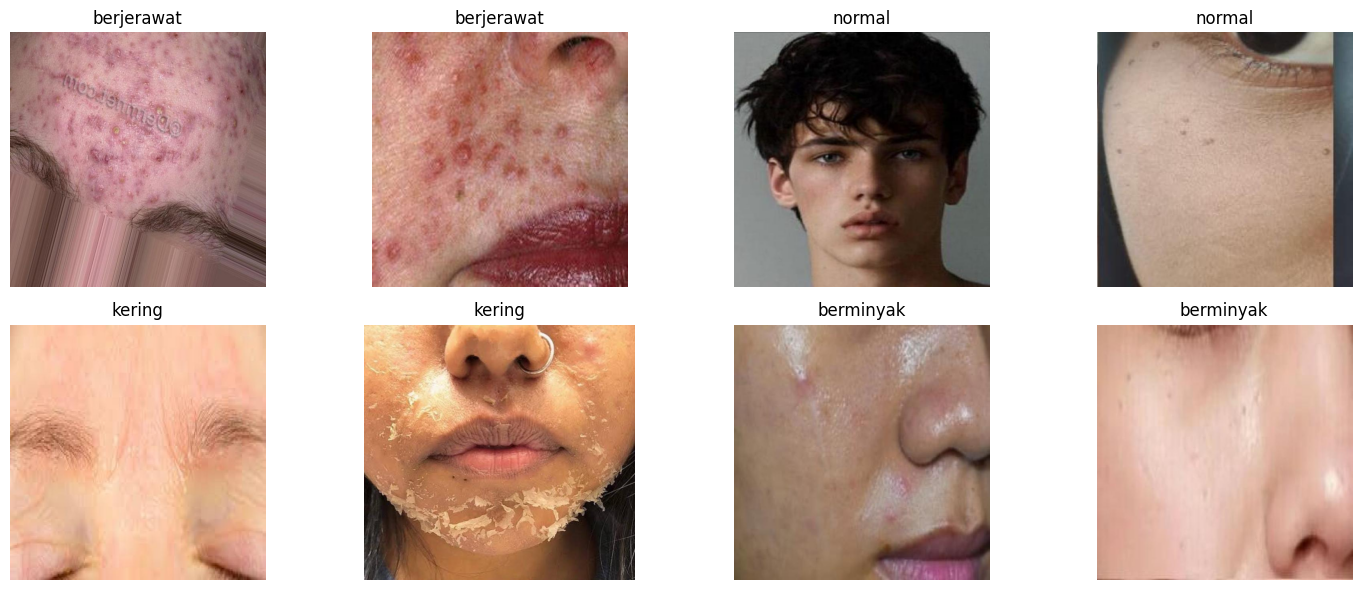

In [14]:
# Example
fig, axes = plt.subplots(2, len(class_distribution), figsize=(15, 6))
axes = axes.flatten()

for i, class_name in enumerate(class_distribution.index):
    sample_images = df[df['class'] == class_name].sample(2, random_state=42)
    for j, (_, row) in enumerate(sample_images.iterrows()):
        img = Image.open(row['file_path'])
        axes[i*2 + j].imshow(img)
        axes[i*2 + j].set_title(class_name)
        axes[i*2 + j].axis('off')

plt.tight_layout()
plt.show()


# Visualization

## Barchart Image Distribution per Class

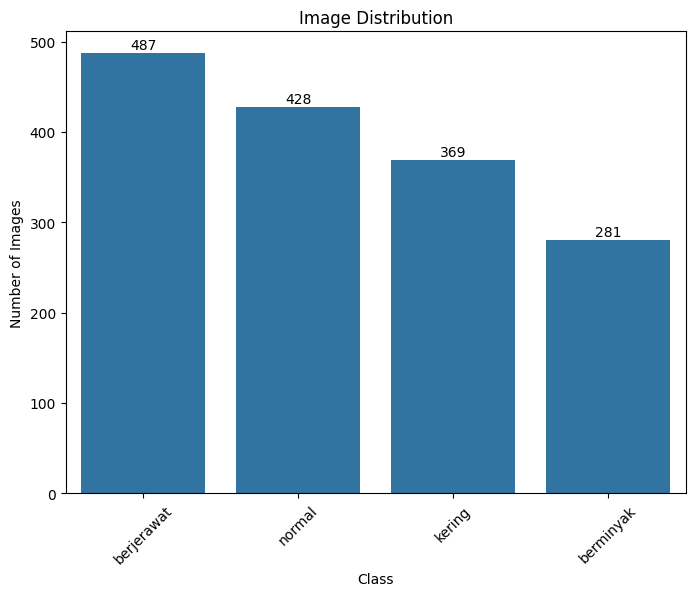

In [20]:
# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values)

for i, value in enumerate(class_distribution.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Image Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


## Piechart Image Distribution per Class

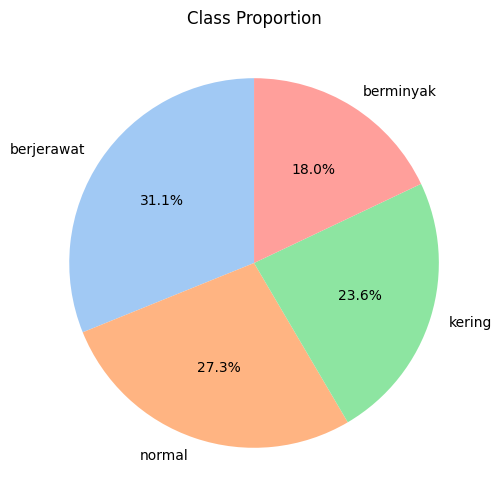

In [13]:
# Piechart
plt.figure(figsize=(8, 6))
class_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Class Proportion')
plt.ylabel('')
plt.show()


## Scatter Plot Image Size

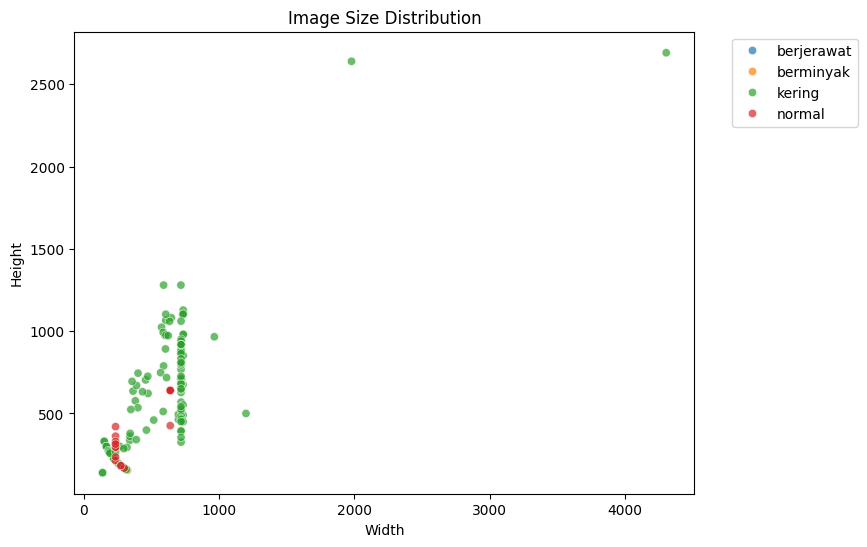

In [19]:
# Pict size
image_sizes = []
for _, row in df.iterrows():
    with Image.open(row['file_path']) as img:
        image_sizes.append(img.size)

# Dataframe
df['image_size'] = image_sizes
df['width'] = df['image_size'].apply(lambda x: x[0])
df['height'] = df['image_size'].apply(lambda x: x[1])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='width', y='height', hue='class', alpha=0.7)
plt.title('Image Size Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
